In [ ]:
import matplotlib.pyplot as plt, seaborn as sns,numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re, numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D

In [ ]:
udef count_ripes_unripes(file_path):
    num_ripes_list, num_unripes_list = [], []
    date_list = [] 
    with open(file_path ,'r') as f:
        for line in f:
            if line.startswith(" The image"):
              line = line.replace('-','_')
              match = re.search(r'(\d{1,2}_\d{1,2})(?:\(\d+\))?\.', line)
              if match:
                date = match.group(1)
                date_list.append(date)
                
            if not line.startswith(" The image") and not line.startswith('Done.'):
                num_ripes = 0
                num_unripes = 0
                matches_ripes = re.findall(r'(\d+)\s*ripe(s)?', line)
                matches_unripes = re.findall(r'(\d+)\s*unripe(s)?', line)
                if matches_ripes:
                    num_ripes += int(matches_ripes[0][0])
                num_ripes_list.append(num_ripes)
                if matches_unripes:
                    num_unripes += int(matches_unripes[0][0])
                num_unripes_list.append(num_unripes)
    return num_ripes_list, num_unripes_list, date_list
      



In [ ]:
mAP_model = {'mAP': [ 0.904, 0.892,  0.605, 0.885, 0.866, 0.555, 0.898, 0.875, 0.556],
'model': ['Yolov7','Yolov7','Yolov7', 'Yolov5', 'Yolov5','Yolov5', 'Yolov5m6', 'Yolov5m6','Yolov5m6'],
'mode': ['fruits', 'binary', 'multiclass','fruits', 'binary', 'multiclass','fruits', 'binary', 'multiclass']}

In [ ]:
df = pd.DataFrame(mAP_model)
df

,mAP,model,mode
0,0.904,Yolov7,fruits
1,0.892,Yolov7,binary
2,0.605,Yolov7,multiclass
3,0.885,Yolov5,fruits
4,0.866,Yolov5,binary
5,0.555,Yolov5,multiclass
6,0.898,Yolov5m6,fruits
7,0.875,Yolov5m6,binary
8,0.556,Yolov5m6,multiclass


In [ ]:
df['AP (%)'] = [ap * 100 for ap in df.mAP]

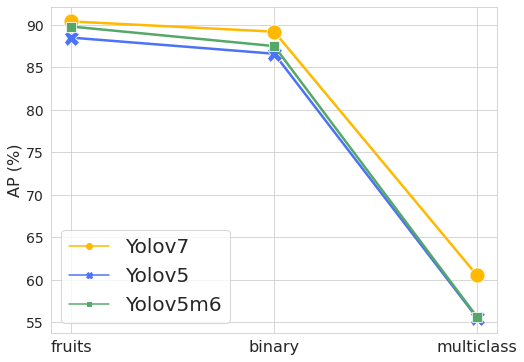

In [ ]:


# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set color palette
colors = {'Yolov7': '#FFB900', 'Yolov5': '#4C72F7', 'Yolov5m6': '#55A868'}

# Create line plot with dots
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x='mode', y='AP (%)', hue='model', data=df, palette = colors, style = 'model', linewidth=2.5, markers=True, markersize=15,dashes=False)
plt.legend(fontsize=20)


# Add marker legend to plot

plt.ylabel('AP (%)', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.xticks(fontsize=16,)
plt.yticks(fontsize=14)
plt.show()


In [ ]:
cd /content/drive/MyDrive/yolov7

/content/drive/MyDrive/yolov7


In [ ]:
!cp /content/drive/MyDrive/yolov7/detect.py /content/drive/MyDrive/yolov7/detect_mono.py
!cp /content/drive/MyDrive/yolov7/detect.py /content/drive/MyDrive/yolov7/detect_binary.py
!cp /content/drive/MyDrive/yolov7/detect.py /content/drive/MyDrive/yolov7/detect_continuous.py


In [ ]:
!python detect_continuous.py --weights /content/drive/MyDrive/yolov7/runs/train/yolov7-first-gen-continuous/weights/best.pt --conf 0.5 --img-size 640 --device 'cpu' --source /content/drive/MyDrive/yolov7/paper_images/BL_08_alto_16_05.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='cpu', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7/paper_images/BL_08_alto_16_05.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/yolov7/runs/train/yolov7-first-gen-continuous/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36503348 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.me

86


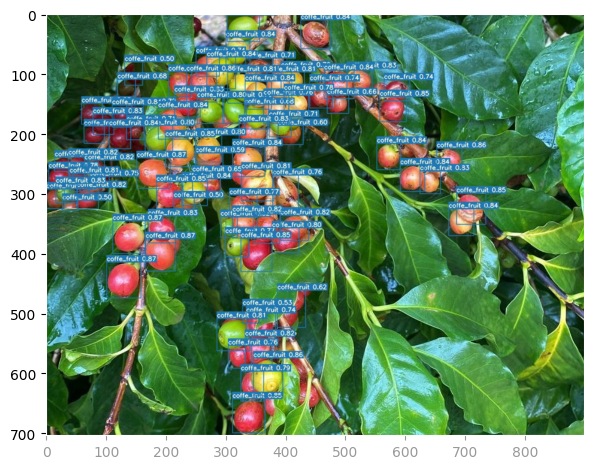

In [ ]:
import matplotlib.pyplot as plt 
import PIL

plt.imshow(plt.imread('runs/detect/exp8/BL_08_alto_16_05.jpg'))

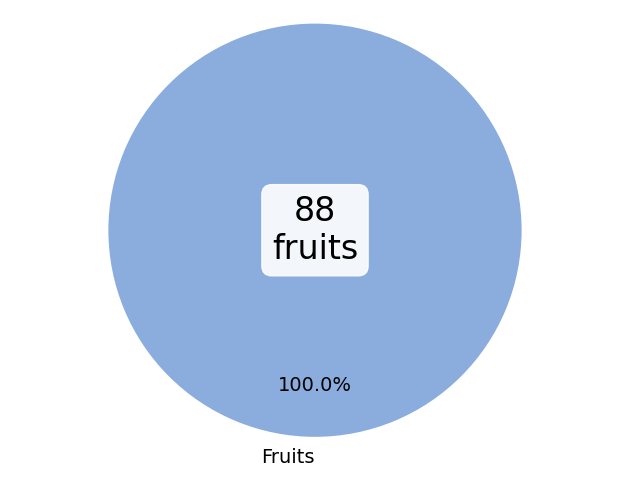

In [ ]:
import matplotlib.pyplot as plt

# Dados
fruits = [88]
labels = ['Fruits']
colors = [(138/255, 173/255, 222/255)]

# Configurações de plotagem
plt.style.use('default')
plt.rcParams.update({'figure.autolayout': True})

# Cria o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(fruits, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75, labeldistance=1.1, textprops={'fontsize': 14})
ax.axis('equal')

# Centraliza a anotação
annotation = ax.text(0, 0, f"{sum(fruits)}\nfruits", ha='center', va='center', fontsize=24, color='black')
annotation.set_bbox(dict(facecolor='white', edgecolor='white', alpha=0.9, boxstyle='round'))

# Exibe o gráfico
plt.show()


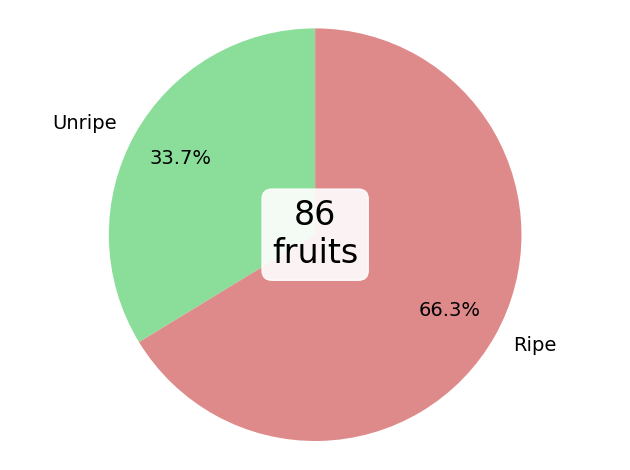

In [ ]:
import matplotlib.pyplot as plt

# Dados
fruits = [29, 57]
labels = ['Unripe', 'Ripe']
colors = [(138/255, 222/255, 153/255), (222/255, 138/255, 138/255)]

# Configurações de plotagem
plt.style.use('default')
plt.rcParams.update({'figure.autolayout': True})

# Cria o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(fruits, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75, labeldistance=1.1, textprops={'fontsize': 14})
ax.axis('equal')

# Centraliza a anotação
annotation = ax.text(0, 0, f"{sum(fruits)}\nfruits", ha='center', va='center', fontsize=24, color='black')
annotation.set_bbox(dict(facecolor='white', edgecolor='white', alpha=0.9, boxstyle='round'))

# Exibe o gráfico
plt.show()


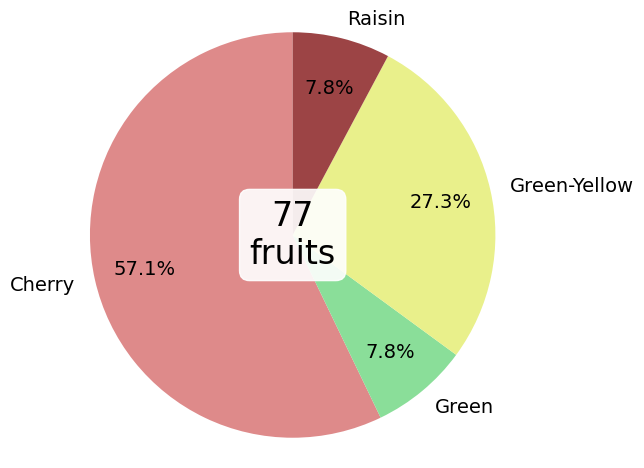

In [ ]:
# Dados
fruits = [44, 6, 21, 6]
labels = ['Cherry', 'Green', 'Green-Yellow', 'Raisin']
colors = [
    (222/255, 138/255, 138/255),
    (138/255, 222/255, 153/255), 
    (233/255, 240/255, 139/255),
    (156/255, 68/255, 69/255)
]

# Configurações de plotagem
plt.style.use('default')
plt.rcParams.update({'figure.autolayout': True})

# Cria o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(fruits, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.75, labeldistance=1.1, textprops={'fontsize': 14})
ax.axis('equal')

# Centraliza a anotação
annotation = ax.text(0, 0, f"{sum(fruits)}\nfruits", ha='center', va='center', fontsize=24, color='black')
annotation.set_bbox(dict(facecolor='white', edgecolor='white', alpha=0.9, boxstyle='round'))

# Exibe o gráfico
plt.show()
